# Rangkuman Chapter 2: End-to-End Machine Learning Project

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 2 dengan implementasi Python untuk proyek ML end-to-end menggunakan dataset California Housing Prices.

## 1. Langkah-Langkah Proyek ML

Berikut adalah langkah utama dalam proyek Machine Learning:

1. **Look at the big picture**: Memahami tujuan bisnis
2. **Get the data**: Mengambil dan memuat data
3. **Discover and visualize**: Eksplorasi data untuk mendapatkan insight
4. **Prepare the data**: Persiapan data untuk algoritma ML
5. **Select and train a model**: Memilih dan melatih model
6. **Fine-tune the model**: Optimasi hyperparameter
7. **Present the solution**: Presentasi hasil
8. **Launch, monitor, and maintain**: Deploy dan monitoring sistem

## 2. Look at the Big Picture

### 2.1 Frame the Problem

**Studi Kasus**: Membangun model untuk memprediksi median housing price di California berdasarkan data census.

**Jenis Problem**:
- **Supervised Learning**: Data memiliki label (median house value)
- **Regression Task**: Memprediksi nilai numerik
- **Multiple Regression**: Menggunakan multiple features
- **Univariate Regression**: Memprediksi satu nilai per district
- **Batch Learning**: Data cukup kecil untuk fit di memory

### 2.2 Select Performance Measure

**Root Mean Square Error (RMSE)**:
- Performance measure yang umum untuk regression
- Memberikan weight lebih besar untuk error yang besar
- Formula: RMSE = √(1/m × Σ(h(x^(i)) - y^(i))²)

**Mean Absolute Error (MAE)**:
- Alternatif untuk RMSE
- Lebih robust terhadap outliers
- Formula: MAE = 1/m × Σ|h(x^(i)) - y^(i))|

## 3. Get the Data

### 3.1 Download dan Load Data

In [1]:
# Import libraries
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [2]:
# Fungsi untuk download data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Download data
fetch_housing_data()
print("Data berhasil didownload!")

Data berhasil didownload!


C:\Users\HP Pavilion 15\AppData\Local\Temp\ipykernel_22604\3064998341.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [3]:
# Fungsi untuk load data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Load data
housing = load_housing_data()
print("\nData berhasil dimuat!")
print(f"Jumlah instances: {len(housing)}")


Data berhasil dimuat!
Jumlah instances: 20640


### 3.2 Quick Look at Data Structure

In [4]:
# Lihat 5 baris pertama
print("\n=== Top 5 Rows ===")
print(housing.head())


=== Top 5 Rows ===
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
# Info dataset
print("\n=== Dataset Info ===")
housing.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Nilai kategori ocean_proximity
print("\n=== Ocean Proximity Categories ===")
print(housing["ocean_proximity"].value_counts())


=== Ocean Proximity Categories ===
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [7]:
# Summary statistik
print("\n=== Statistical Summary ===")
print(housing.describe())


=== Statistical Summary ===
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.4

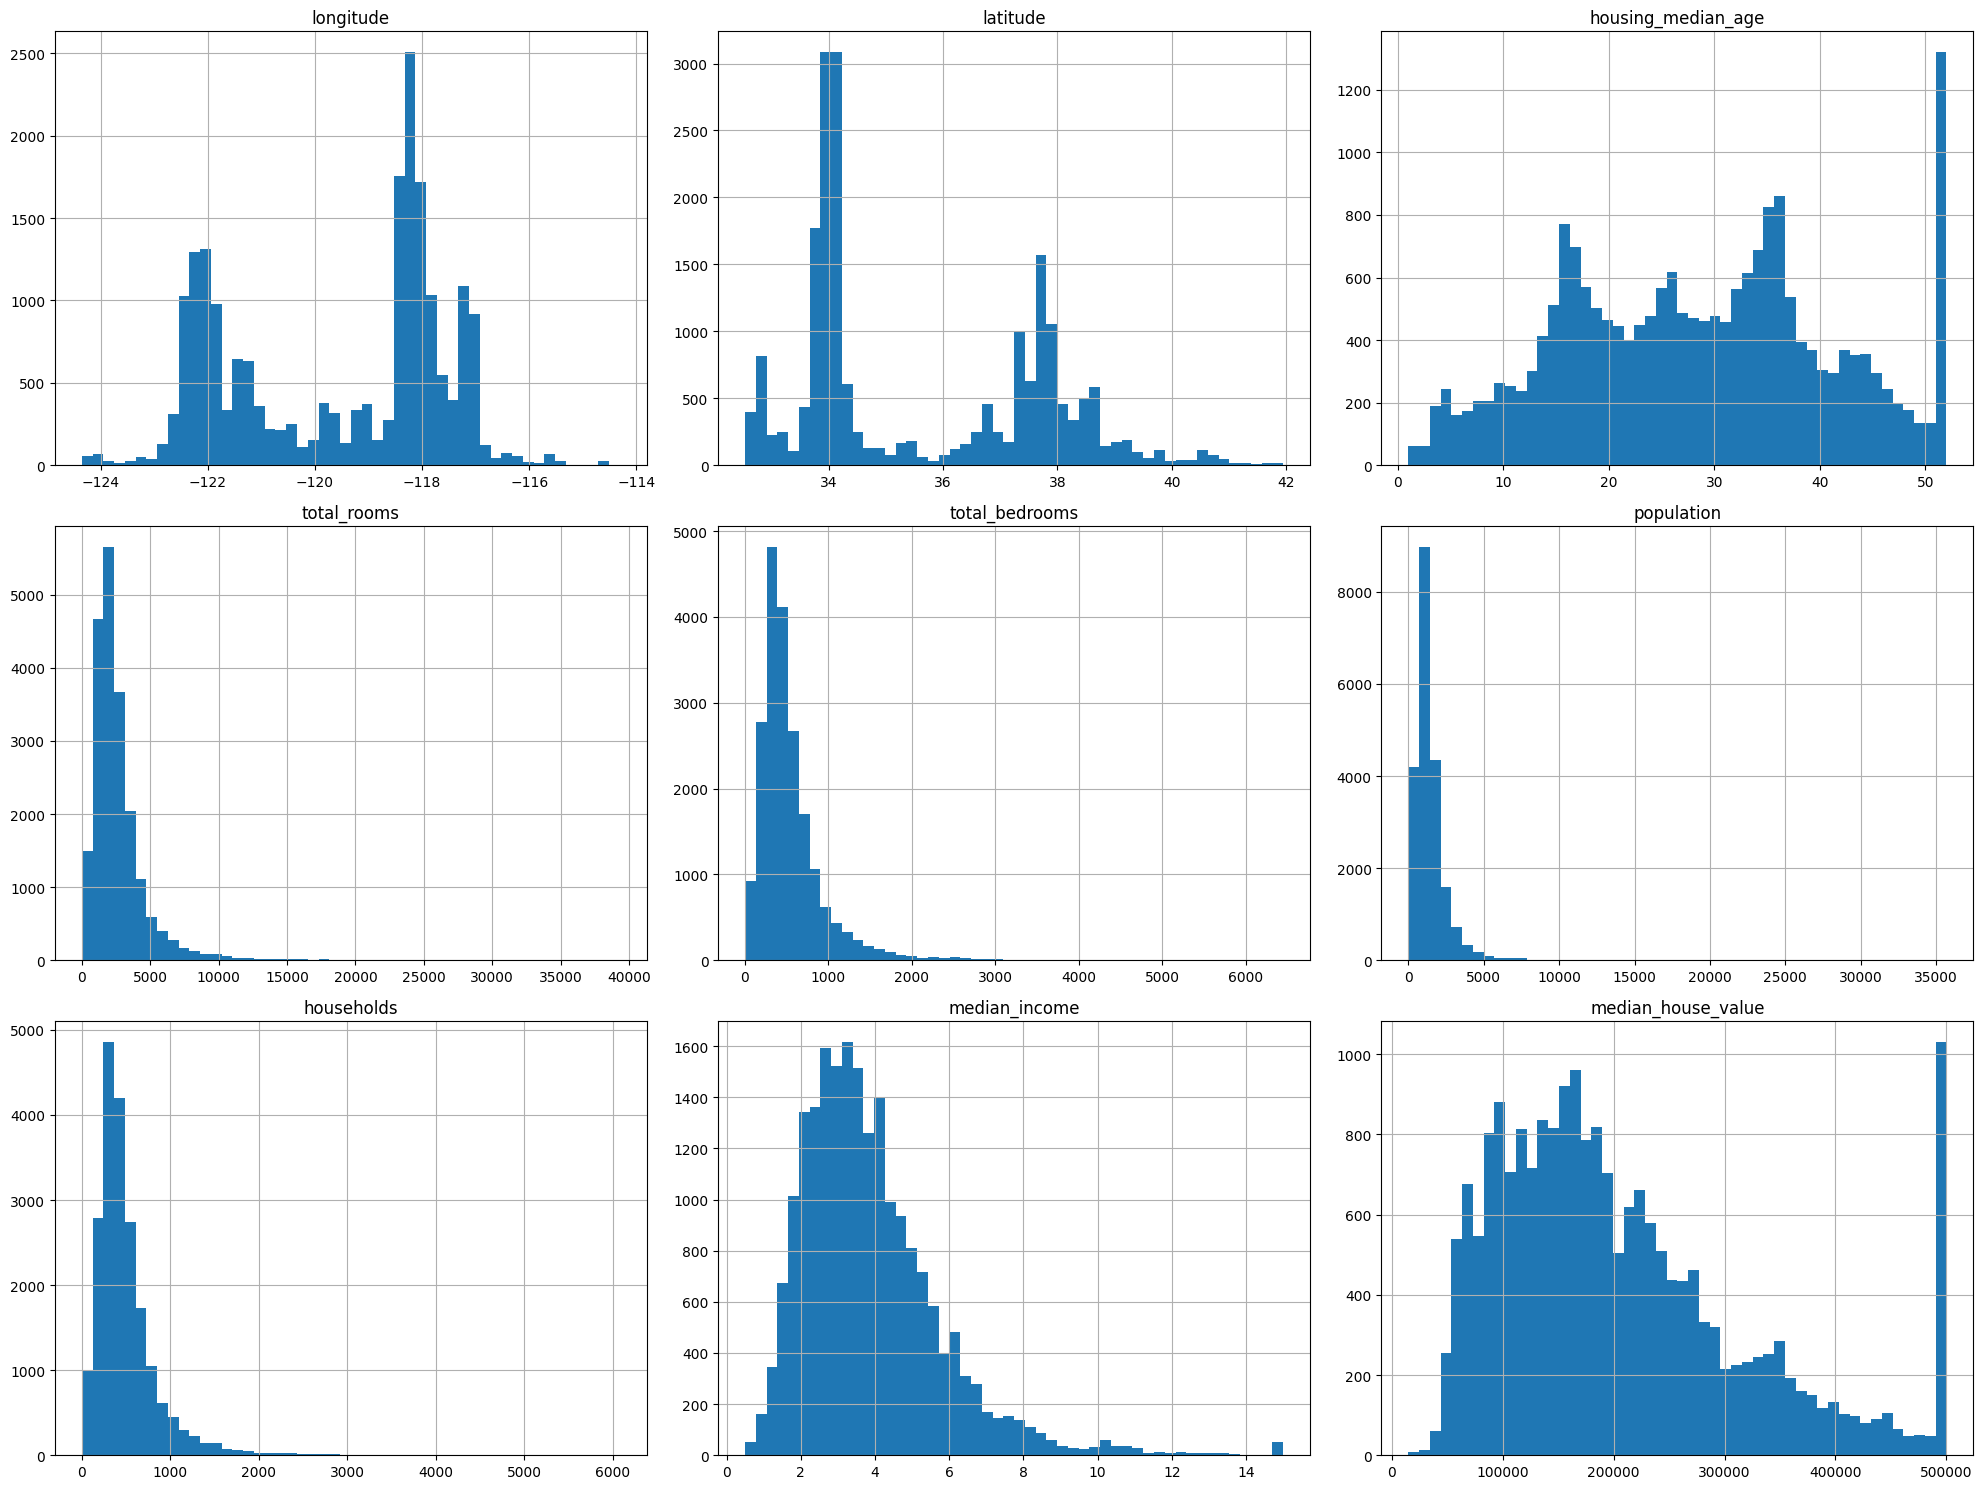


Observasi dari histogram:
1. median_income sudah di-scale (bukan dalam dollar asli)
2. housing_median_age dan median_house_value di-cap pada nilai maksimum
3. Atribut memiliki scale yang sangat berbeda
4. Banyak histogram yang tail-heavy (skewed ke kanan)


In [8]:
# Plot histogram untuk semua numerical attributes
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

print("\nObservasi dari histogram:")
print("1. median_income sudah di-scale (bukan dalam dollar asli)")
print("2. housing_median_age dan median_house_value di-cap pada nilai maksimum")
print("3. Atribut memiliki scale yang sangat berbeda")
print("4. Banyak histogram yang tail-heavy (skewed ke kanan)")

### 3.3 Create Test Set

Penting untuk membuat test set di awal dan tidak melihatnya sampai akhir untuk menghindari **data snooping bias**.

In [9]:
# Metod 1: Simple random split (tidak direkomendasikan untuk production)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Metode 2: Menggunakan sklearn (lebih baik)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("=== Simple Train-Test Split ===")
print(f"Training set: {len(train_set)} samples")
print(f"Test set: {len(test_set)} samples")

=== Simple Train-Test Split ===
Training set: 16512 samples
Test set: 4128 samples


### 3.4 Stratified Sampling

**Stratified Sampling** memastikan test set representative terhadap populasi dengan membagi data ke dalam strata yang homogen.

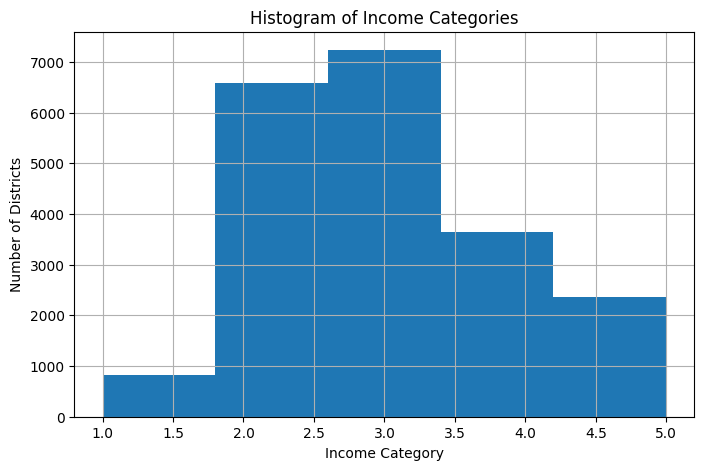

In [10]:
# Buat income category untuk stratified sampling
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Plot histogram
housing["income_cat"].hist(bins=5, figsize=(8, 5))
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.title('Histogram of Income Categories')
plt.show()

In [11]:
# Stratified sampling berdasarkan income_cat
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print("=== Stratified Train-Test Split ===")
print(f"Training set: {len(strat_train_set)} samples")
print(f"Test set: {len(strat_test_set)} samples")

# Verifikasi proporsi
print("\nProporsi income category di test set:")
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

=== Stratified Train-Test Split ===
Training set: 16512 samples
Test set: 4128 samples

Proporsi income category di test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [12]:
# Hapus income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print("income_cat attribute telah dihapus")

income_cat attribute telah dihapus


## 4. Discover and Visualize Data

Sekarang eksplorasi training set untuk mendapatkan insights (jangan sentuh test set!).

In [13]:
# Buat copy untuk eksplorasi
housing = strat_train_set.copy()

### 4.1 Visualizing Geographical Data

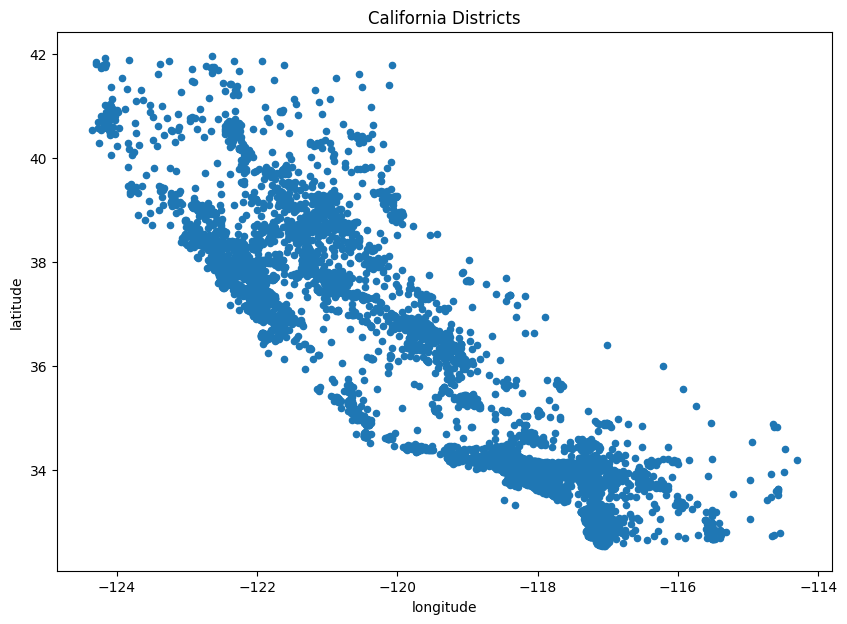

In [14]:
# Scatterplot sederhana
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.title('California Districts')
plt.show()

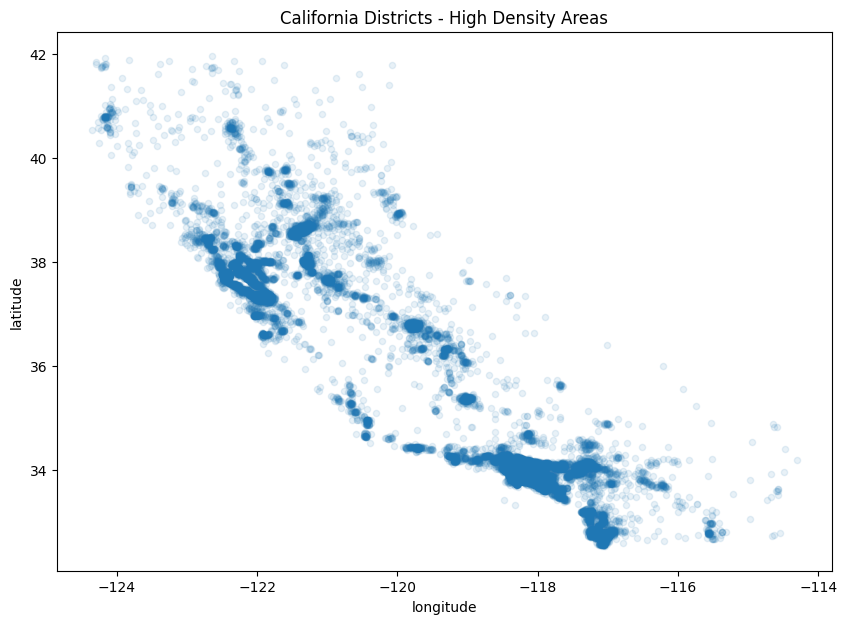

Terlihat jelas: Bay Area, Los Angeles, San Diego, dan Central Valley


In [15]:
# Scatterplot dengan alpha untuk melihat density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10, 7))
plt.title('California Districts - High Density Areas')
plt.show()

print("Terlihat jelas: Bay Area, Los Angeles, San Diego, dan Central Valley")

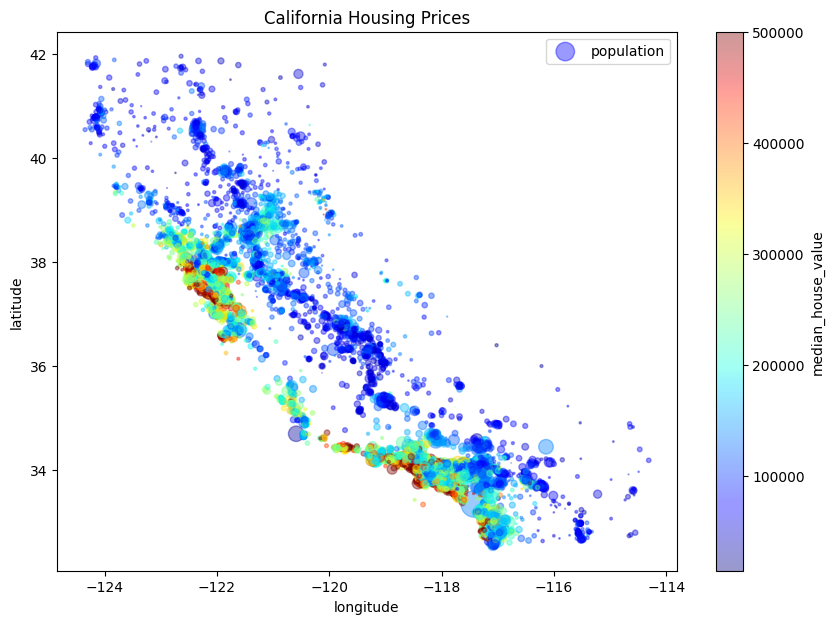


Observasi:
- Housing prices sangat terkait dengan lokasi (dekat laut)
- Harga juga terkait dengan population density
- Merah = mahal, Biru = murah
- Ukuran circle = populasi


In [16]:
# Scatterplot dengan housing prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10, 7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California Housing Prices')
plt.legend()
plt.show()

print("\nObservasi:")
print("- Housing prices sangat terkait dengan lokasi (dekat laut)")
print("- Harga juga terkait dengan population density")
print("- Merah = mahal, Biru = murah")
print("- Ukuran circle = populasi")

### 4.2 Looking for Correlations

In [17]:
# Hitung correlation matrix hanya untuk atribut numerik (abaikan categorical)
housing_num = housing.select_dtypes(include=[np.number])
corr_matrix = housing_num.corr()

# Lihat korelasi dengan median_house_value
print("=== Correlation with median_house_value ===")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

=== Correlation with median_house_value ===
median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


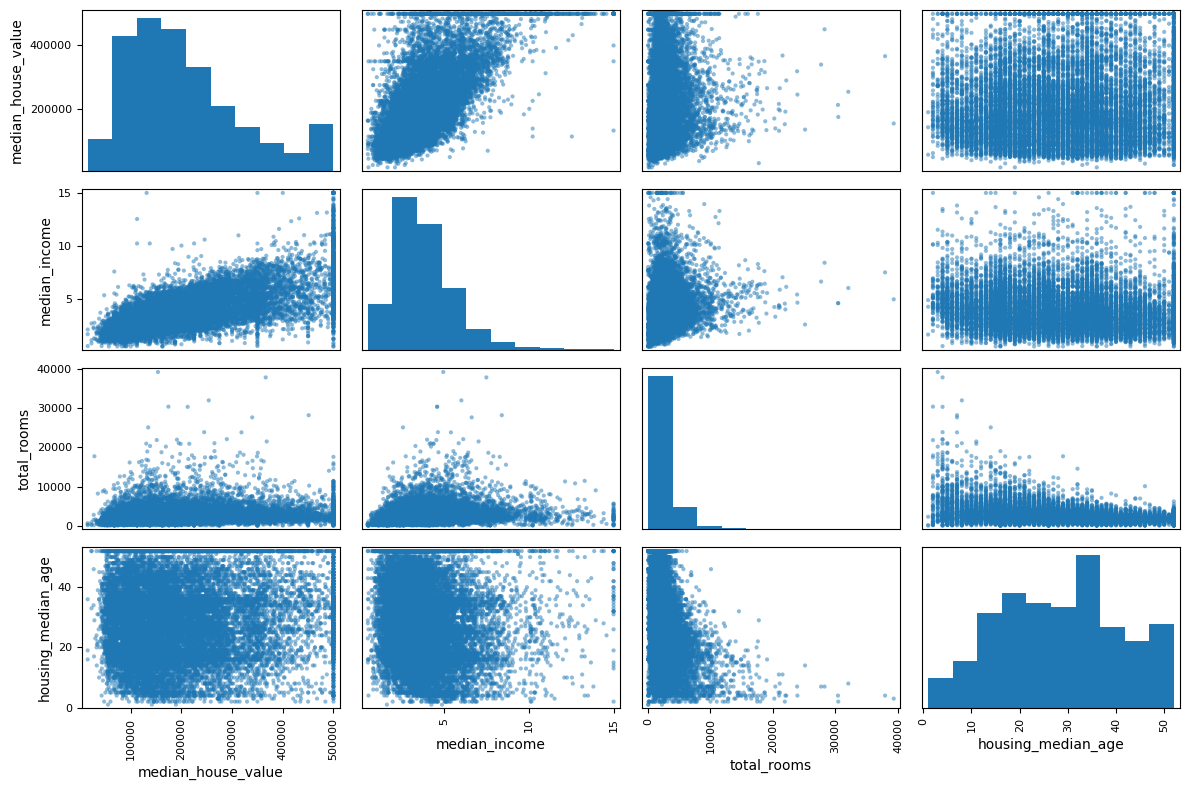

In [18]:
# Scatter matrix untuk atribut penting
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

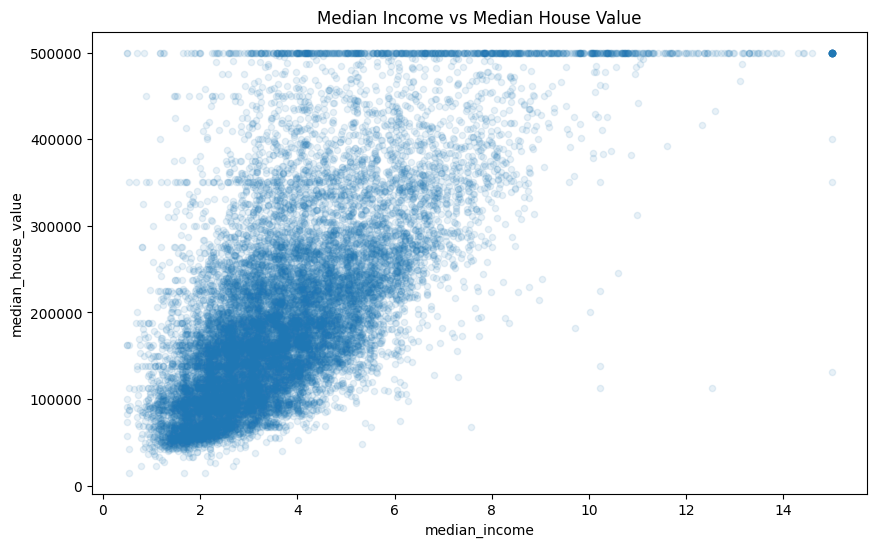


Observasi:
- Korelasi sangat kuat dan jelas
- Terlihat price cap di $500,000
- Ada beberapa horizontal lines (quirks) yang mungkin perlu dibersihkan


In [19]:
# Zoom in pada median_income vs median_house_value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, figsize=(10, 6))
plt.title('Median Income vs Median House Value')
plt.show()

print("\nObservasi:")
print("- Korelasi sangat kuat dan jelas")
print("- Terlihat price cap di $500,000")
print("- Ada beberapa horizontal lines (quirks) yang mungkin perlu dibersihkan")

### 4.3 Experimenting with Attribute Combinations

In [20]:
# Buat kombinasi atribut baru (hanya untuk kolom numerik)
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Untuk menghindari error ketika ada kolom non-numerik (mis. 'ocean_proximity'),
# ambil hanya kolom numerik sebelum menghitung korelasi.
housing_numeric = housing.select_dtypes(include=[np.number])

# Lihat korelasi lagi (hanya numeric)
corr_matrix = housing_numeric.corr()
print("=== Correlation with median_house_value (with new attributes) ===")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

print("\nObservasi:")
print("- bedrooms_per_room memiliki korelasi negatif yang lebih kuat (-0.26)")
print("- rooms_per_household lebih informatif dari total_rooms")

=== Correlation with median_house_value (with new attributes) ===
median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Observasi:
- bedrooms_per_room memiliki korelasi negatif yang lebih kuat (-0.26)
- rooms_per_household lebih informatif dari total_rooms


## 5. Prepare the Data for ML Algorithms

Persiapan data harus dilakukan dengan fungsi yang reusable untuk reproducibility.

In [21]:
# Revert ke clean training set dan pisahkan predictors & labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

print(f"Predictors shape: {housing.shape}")
print(f"Labels shape: {housing_labels.shape}")

Predictors shape: (16512, 9)
Labels shape: (16512,)


### 5.1 Data Cleaning

In [22]:
# Cek missing values
print("=== Missing Values ===")
print(housing.isnull().sum())

# total_bedrooms memiliki missing values

=== Missing Values ===
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64


In [23]:
# Menggunakan SimpleImputer untuk handle missing values
from sklearn.impute import SimpleImputer

# Buat imputer dengan strategy median
imputer = SimpleImputer(strategy="median")

# Hanya untuk numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit imputer
imputer.fit(housing_num)

print("=== Imputer Statistics ===")
print(f"Medians: {imputer.statistics_}")
print(f"\nVerifikasi dengan pandas:")
print(housing_num.median().values)

=== Imputer Statistics ===
Medians: [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

Verifikasi dengan pandas:
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [24]:
# Transform data
X = imputer.transform(housing_num)

# Convert back ke DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

print("=== After Imputation ===")
print(f"Missing values: {housing_tr.isnull().sum().sum()}")
print("Semua missing values telah di-handle!")

=== After Imputation ===
Missing values: 0
Semua missing values telah di-handle!


### 5.2 Handling Text and Categorical Attributes

In [25]:
# Lihat categorical attribute
housing_cat = housing[["ocean_proximity"]]
print("=== Categorical Data (first 10) ===")
print(housing_cat.head(10))

=== Categorical Data (first 10) ===
      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN


In [26]:
# Ordinal Encoding (tidak direkomendasikan untuk categorical tanpa order)
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print("=== Ordinal Encoding ===")
print(f"First 10 encoded values:\n{housing_cat_encoded[:10]}")
print(f"\nCategories: {ordinal_encoder.categories_}")

=== Ordinal Encoding ===
First 10 encoded values:
[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]

Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [27]:
# One-Hot Encoding (lebih baik untuk categorical)
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print("=== One-Hot Encoding ===")
print(f"Sparse matrix: {housing_cat_1hot}")
print(f"\nDense array (first 10 rows):\n{housing_cat_1hot.toarray()[:10]}")
print(f"\nCategories: {cat_encoder.categories_}")

=== One-Hot Encoding ===
Sparse matrix: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0

Dense array (first 10 rows):
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 

### 5.3 Custom Transformers

In [28]:
# Custom transformer untuk menambahkan combined attributes
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Test transformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

print("=== Custom Transformer ===")
print(f"Original shape: {housing.values.shape}")
print(f"After transformation: {housing_extra_attribs.shape}")
print("2 atribut baru ditambahkan!")

=== Custom Transformer ===
Original shape: (16512, 9)
After transformation: (16512, 11)
2 atribut baru ditambahkan!


### 5.4 Feature Scaling

**Feature scaling** sangat penting karena ML algorithms tidak perform baik jika input attributes memiliki scale yang berbeda.

Dua metode umum:
1. **Min-Max Scaling (Normalization)**: Scale ke range 0-1
2. **Standardization**: Zero mean dan unit variance (lebih robust terhadap outliers)

### 5.5 Transformation Pipelines

In [29]:
# Pipeline untuk numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

print("=== Numerical Pipeline ===")
print(f"Transformed shape: {housing_num_tr.shape}")
print("Pipeline steps: imputer → attribs_adder → std_scaler")

=== Numerical Pipeline ===
Transformed shape: (16512, 11)
Pipeline steps: imputer → attribs_adder → std_scaler


In [30]:
# Full pipeline (numerical + categorical)
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

print("=== Full Pipeline ===")
print(f"Final transformed shape: {housing_prepared.shape}")
print(f"Original features: {len(housing.columns)}")
print(f"Final features: {housing_prepared.shape[1]}")
print("\nData siap untuk ML algorithms!")

=== Full Pipeline ===
Final transformed shape: (16512, 16)
Original features: 9
Final features: 16

Data siap untuk ML algorithms!


## 6. Select and Train a Model

### 6.1 Training and Evaluating on the Training Set

In [31]:
# Model 1: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Prediksi pada beberapa instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("=== Linear Regression ===")
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:     ", list(some_labels))

=== Linear Regression ===
Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:      [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [32]:
# Evaluasi pada full training set
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(f"\nLinear Regression RMSE: ${lin_rmse:,.2f}")
print("\nObservasi: RMSE cukup tinggi, model underfitting")


Linear Regression RMSE: $68,627.87

Observasi: RMSE cukup tinggi, model underfitting


In [33]:
# Model 2: Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

# Evaluasi
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print(f"\nDecision Tree RMSE: ${tree_rmse:,.2f}")
print("\nObservasi: RMSE = 0, model sangat overfit!")


Decision Tree RMSE: $0.00

Observasi: RMSE = 0, model sangat overfit!


### 6.2 Better Evaluation Using Cross-Validation

In [34]:
# Cross-validation untuk Decision Tree
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# K-fold cross-validation
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("=== Decision Tree Cross-Validation ===")
display_scores(tree_rmse_scores)

=== Decision Tree Cross-Validation ===
Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [35]:
# Cross-validation untuk Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("=== Linear Regression Cross-Validation ===")
display_scores(lin_rmse_scores)

=== Linear Regression Cross-Validation ===
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [36]:
# Model 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# Evaluasi
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

print(f"\nRandom Forest RMSE (training): ${forest_rmse:,.2f}")

# Cross-validation
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("\n=== Random Forest Cross-Validation ===")
display_scores(forest_rmse_scores)


Random Forest RMSE (training): $22,413.45

=== Random Forest Cross-Validation ===
Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard deviation: 2262.8151900582


## 7. Fine-Tune the Model

### 7.1 Grid Search

In [37]:
# Grid Search untuk Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

print("Training Grid Search...")
grid_search.fit(housing_prepared, housing_labels)
print("Grid Search selesai!")

Training Grid Search...
Grid Search selesai!


In [38]:
# Best parameters
print("=== Grid Search Results ===")
print(f"Best parameters: {grid_search.best_params_}")
print(f"\nBest estimator: {grid_search.best_estimator_}")

=== Grid Search Results ===
Best parameters: {'max_features': 8, 'n_estimators': 30}

Best estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [39]:
# Lihat semua scores
cvres = grid_search.cv_results_
print("\n=== All Scores ===")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"RMSE: ${np.sqrt(-mean_score):,.2f} - Params: {params}")


=== All Scores ===
RMSE: $63,895.16 - Params: {'max_features': 2, 'n_estimators': 3}
RMSE: $54,916.32 - Params: {'max_features': 2, 'n_estimators': 10}
RMSE: $52,885.87 - Params: {'max_features': 2, 'n_estimators': 30}
RMSE: $60,075.37 - Params: {'max_features': 4, 'n_estimators': 3}
RMSE: $52,495.01 - Params: {'max_features': 4, 'n_estimators': 10}
RMSE: $50,187.24 - Params: {'max_features': 4, 'n_estimators': 30}
RMSE: $58,064.74 - Params: {'max_features': 6, 'n_estimators': 3}
RMSE: $51,519.32 - Params: {'max_features': 6, 'n_estimators': 10}
RMSE: $49,969.80 - Params: {'max_features': 6, 'n_estimators': 30}
RMSE: $58,895.82 - Params: {'max_features': 8, 'n_estimators': 3}
RMSE: $52,459.80 - Params: {'max_features': 8, 'n_estimators': 10}
RMSE: $49,898.99 - Params: {'max_features': 8, 'n_estimators': 30}
RMSE: $62,381.77 - Params: {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
RMSE: $54,476.57 - Params: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
RMSE: $

### 7.2 Analyze the Best Models

In [40]:
# Feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Get feature names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Sort by importance
print("=== Feature Importances ===")
for importance, attr_name in sorted(zip(feature_importances, attributes), reverse=True):
    print(f"{attr_name:30s}: {importance:.4f}")

=== Feature Importances ===
median_income                 : 0.3790
INLAND                        : 0.1657
pop_per_hhold                 : 0.1070
longitude                     : 0.0697
latitude                      : 0.0604
rooms_per_hhold               : 0.0548
bedrooms_per_room             : 0.0482
housing_median_age            : 0.0422
population                    : 0.0158
total_bedrooms                : 0.0156
total_rooms                   : 0.0152
households                    : 0.0149
<1H OCEAN                     : 0.0068
NEAR OCEAN                    : 0.0030
NEAR BAY                      : 0.0015
ISLAND                        : 0.0001


## 8. Evaluate on Test Set

In [41]:
# Final evaluation pada test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("\n" + "="*60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*60)
print(f"Test RMSE: ${final_rmse:,.2f}")
print("="*60)


FINAL MODEL EVALUATION ON TEST SET
Test RMSE: $47,873.26


In [42]:
# Compute 95% confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                                loc=squared_errors.mean(),
                                                scale=stats.sem(squared_errors)))

print(f"\n95% Confidence Interval: ${confidence_interval[0]:,.2f} - ${confidence_interval[1]:,.2f}")


95% Confidence Interval: $45,893.36 - $49,774.47


## 9. Summary & Best Practices

### End-to-End ML Project Workflow:

1. **Look at the big picture**: 
   - Frame the problem (supervised/unsupervised, regression/classification)
   - Select performance measure (RMSE, MAE, accuracy, etc.)
   - Check assumptions

2. **Get the data**:
   - Download dan load data
   - Quick look at data structure
   - Create test set (stratified sampling jika perlu)

3. **Discover and visualize**:
   - Visualisasi geografis (jika ada)
   - Correlation analysis
   - Experiment dengan attribute combinations

4. **Prepare the data**:
   - Data cleaning (missing values)
   - Handle categorical attributes (One-Hot Encoding)
   - Custom transformers jika perlu
   - Feature scaling (standardization/normalization)
   - Transformation pipelines

5. **Select and train models**:
   - Train beberapa model (Linear Regression, Decision Tree, Random Forest, etc.)
   - Evaluasi dengan cross-validation
   - Shortlist promising models

6. **Fine-tune**:
   - Grid Search atau Randomized Search
   - Analyze best models dan errors
   - Feature importance analysis

7. **Evaluate on test set**:
   - Final evaluation (JANGAN sampai step ini!)
   - Compute confidence interval

8. **Launch, monitor, maintain**:
   - Deploy ke production
   - Monitor performance
   - Retrain dengan data baru secara regular

### Important Notes:

- **Jangan sentuh test set** sampai final evaluation
- **Automate** sebanyak mungkin (pipelines, retraining)
- **Cross-validation** lebih reliable dari simple train/test split
- **Feature engineering** sering lebih penting dari algorithm tuning
- **Monitor** model performance di production
- **Save models** dengan hyperparameters dan scores untuk comparison

## Kesimpulan

Chapter 2 menunjukkan complete workflow dari end-to-end ML project:

✓ **Framing the problem**: Supervised learning, regression task

✓ **Data preparation**: Cleaning, transformations, pipelines

✓ **Model selection**: Linear Regression, Decision Tree, Random Forest

✓ **Evaluation**: Cross-validation untuk reliable estimates

✓ **Fine-tuning**: Grid Search untuk optimal hyperparameters

✓ **Best practices**: Automation, monitoring, maintenance

Project ML melibatkan lebih banyak infrastructure dan data preparation dibanding pure algorithm work. Tapi dengan systematic approach dan tools yang tepat, proses ini bisa efficient dan reproducible.

---
